<a href="https://colab.research.google.com/github/keinam53/Kurs_Pandas/blob/master/10_Case_studies/2_App_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### App Store
1. [Import bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Wstępne przygotowanie danych - preprocessing](#a3)
4. [Jak zbadać rozkład zmiennej?](#a4)
5. [Sprawdzenie braków w danych](#a5)

### <a name='a1'></a> Import bibliotek

In [1]:
import pandas as pd

### <a name='a2'></a> Załadowanie danych

In [2]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/appstore_games.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


###  <a name='a3'></a> Wstępne przygotowanie danych - preprocessing

In [3]:
df_raw.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [4]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

In [6]:
df.drop(columns=['URL', 'Icon URL', 'Subtitle', 'Description', 'In-app Purchases'], inplace=True)
df.head()

,ID,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [7]:
df.set_index('ID', inplace=True)
df.head()

,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
ID,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [10]:
pd.set_option('display.float_format', lambda x: f'{x:.4f}')

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average User Rating,7561.0000,4.0609,0.7514,1.0000,3.5000,4.5000,4.5000,5.0000
User Rating Count,7561.0000,3306.5313,42322.5605,5.0000,12.0000,46.0000,309.0000,3032734.0000
Price,16983.0000,0.8134,7.8357,0.0000,0.0000,0.0000,0.0000,179.9900
Size,17006.0000,115706429.8869,203647677.8481,51328.0000,22950144.0000,56768954.0000,133027072.0000,4005591040.0000


In [12]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,17007,16847,Chess Tactics Thrill,2
Developer,17007,8693,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,123
Age Rating,17007,4,4+,11806
Languages,16947,990,EN,12467
Primary Genre,17007,21,Games,16286
Genres,17007,1004,"Games, Strategy, Puzzle",778
Original Release Date,17007,3084,2/09/2016,75
Current Version Release Date,17007,2512,1/08/2019,118


In [13]:
df.columns

Index(['Name', 'Average User Rating', 'User Rating Count', 'Price',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [14]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head()

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
ID,,,,,,,,,,,,
284921427,Sudoku,4.0000,3553.0000,2.9900,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0000,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.5000,284.0000,1.9900,Kiss The Machine,4+,EN,12328960.0000,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.0000,8376.0000,0.0000,Bayou Games,4+,EN,674816.0000,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.5000,190394.0000,0.0000,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0000,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.5000,28.0000,2.9900,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0000,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


###  <a name='a4'></a> Jak zbadać rozkład zmiennej?

In [15]:
df['primary_genre'].value_counts()

Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Social Networking        9
Book                     9
News                     7
Health & Fitness         5
Food & Drink             4
Music                    3
Navigation               3
Medical                  2
Shopping                 1
Travel                   1
Name: primary_genre, dtype: int64

In [16]:
df['primary_genre'].value_counts().nlargest(5)

Games            16286
Education          222
Entertainment      198
Utilities           77
Sports              60
Name: primary_genre, dtype: int64

In [17]:
df['age_rating'].value_counts()

4+     11806
9+      2481
12+     2055
17+      665
Name: age_rating, dtype: int64

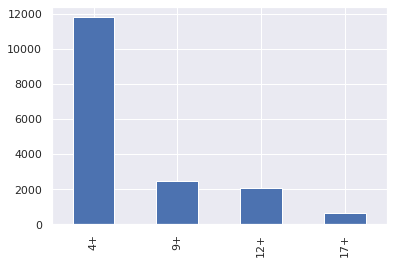

In [19]:
import seaborn as sns
sns.set()

df['age_rating'].value_counts().plot(kind='bar')

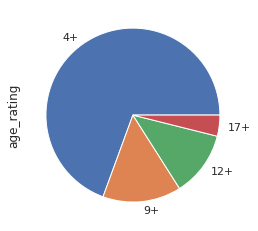

In [20]:
df['age_rating'].value_counts().plot(kind='pie')

In [21]:
df['price'].value_counts()

0.0000      14212
0.9900       1078
1.9900        515
2.9900        471
4.9900        237
3.9900        163
9.9900         88
11.9900        59
5.9900         42
6.9900         32
179.9900       30
7.9900         17
8.9900         13
19.9900         9
14.9900         4
12.9900         3
16.9900         2
29.9900         2
99.9900         1
36.9900         1
59.9900         1
139.9900        1
37.9900         1
18.9900         1
Name: price, dtype: int64

In [22]:
df['average_user_rating'].value_counts()

4.5000    2861
4.0000    1722
5.0000     990
3.5000     925
3.0000     514
2.5000     317
2.0000     158
1.5000      60
1.0000      14
Name: average_user_rating, dtype: int64

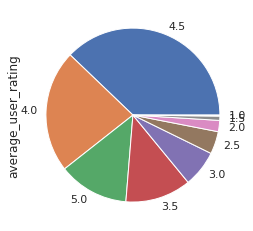

In [23]:
df['average_user_rating'].value_counts().plot(kind='pie')

In [28]:
df['num_lang'] = df['languages'].str.split(', ').str.len()
df.head(3)

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date,num_lang
ID,,,,,,,,,,,,,
284921427,Sudoku,4.0000,3553.0000,2.9900,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0000,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,17.0000
284926400,Reversi,3.5000,284.0000,1.9900,Kiss The Machine,4+,EN,12328960.0000,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,1.0000
284946595,Morocco,3.0000,8376.0000,0.0000,Bayou Games,4+,EN,674816.0000,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,1.0000


In [29]:
df['num_lang'].value_counts()

1.0000      12566
2.0000       1102
3.0000        495
16.0000       316
4.0000        261
5.0000        247
6.0000        220
25.0000       171
9.0000        154
11.0000       147
8.0000        142
10.0000       140
7.0000        140
31.0000       133
12.0000        91
21.0000        77
13.0000        64
14.0000        64
15.0000        54
17.0000        37
30.0000        35
32.0000        34
19.0000        34
33.0000        33
22.0000        31
18.0000        24
46.0000        20
26.0000        18
20.0000        14
24.0000        13
23.0000        11
27.0000        11
28.0000         9
29.0000         8
45.0000         6
44.0000         5
65.0000         4
42.0000         3
43.0000         3
49.0000         2
36.0000         2
76.0000         1
48.0000         1
66.0000         1
35.0000         1
111.0000        1
34.0000         1
Name: num_lang, dtype: int64

###  <a name='a5'></a> Sprawdzenie braków w danych

In [32]:
df['average_user_rating'].value_counts(dropna=False)

nan       9446
4.5000    2861
4.0000    1722
5.0000     990
3.5000     925
3.0000     514
2.5000     317
2.0000     158
1.5000      60
1.0000      14
Name: average_user_rating, dtype: int64

In [33]:
df.isnull().sum()

name                               0
average_user_rating             9446
user_rating_count               9446
price                             24
developer                          0
age_rating                         0
languages                         60
size                               1
primary_genre                      0
genres                             0
original_release_date              0
current_version_release_date       0
num_lang                          60
dtype: int64

In [34]:
df.dropna(inplace=True)
df.isnull().sum()

name                            0
average_user_rating             0
user_rating_count               0
price                           0
developer                       0
age_rating                      0
languages                       0
size                            0
primary_genre                   0
genres                          0
original_release_date           0
current_version_release_date    0
num_lang                        0
dtype: int64